In [1]:
from signal_processing import plot_fft_vertical_horizontal, plot_signals_interactive, get_data_for_participant, signal_processing
from scipy import signal
import pandas as pd

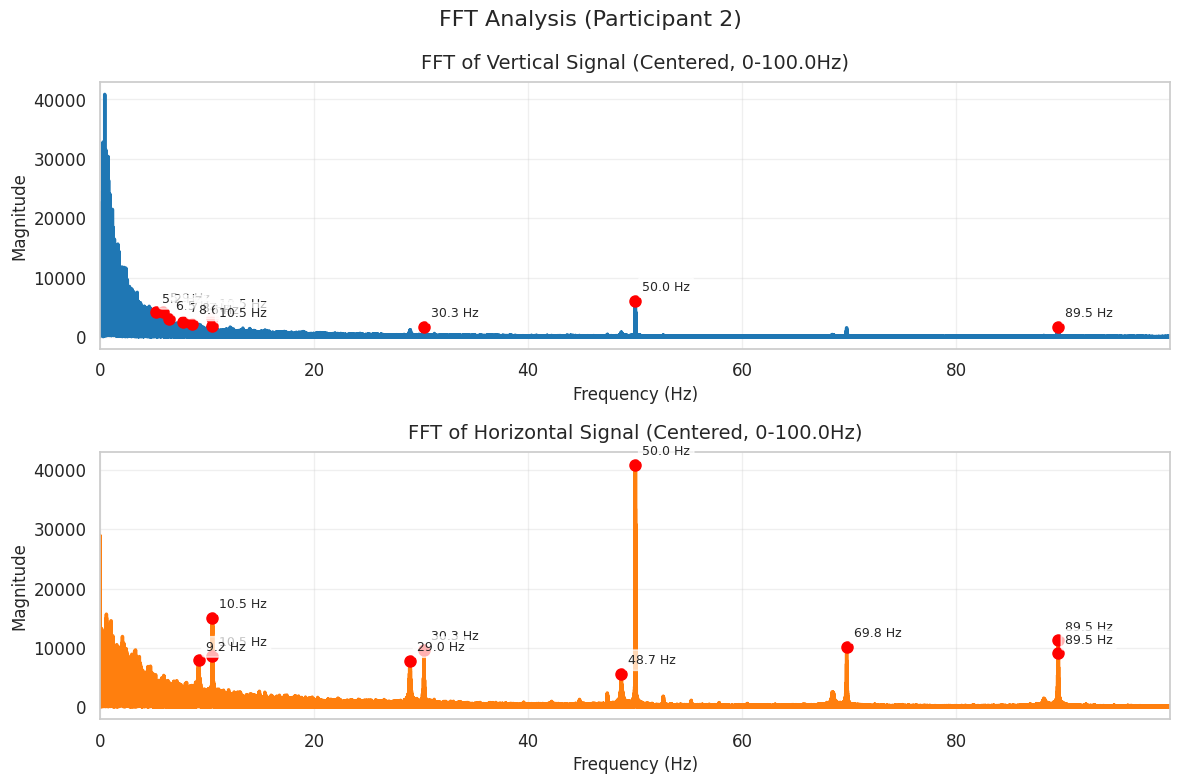

In [34]:
df_final = get_data_for_participant(2, "data/raw/")

plot_fft_vertical_horizontal(df_final["horizontal_value"], df_final["vertical_value"], fs=1000,disp_peaks=True,participant=2)

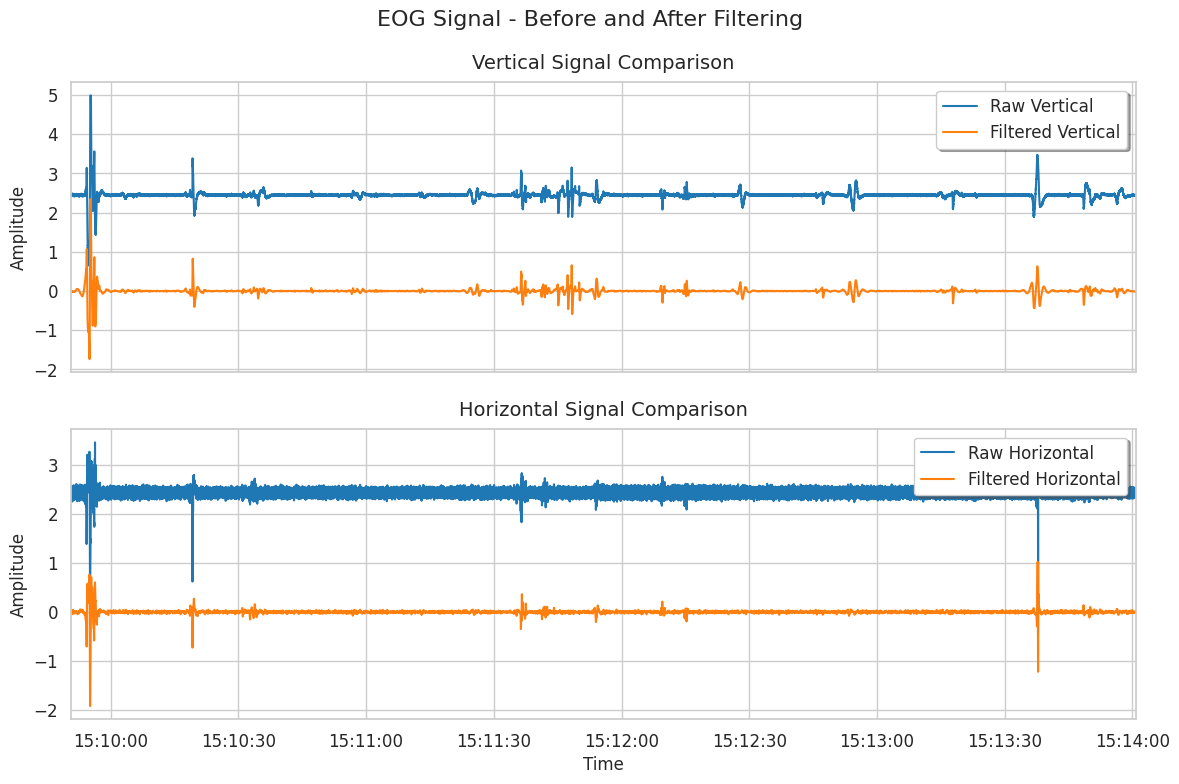

In [ ]:
all_data = df_final.resample("1ms").nearest(limit=2).fillna(2.5)
fs = 1 / pd.Series(all_data.index.diff().total_seconds()).median()
lowcut_freq = 0.5
highcut_freq = 7.5
filter_order = 5

sos = signal.butter(filter_order, [lowcut_freq, highcut_freq], btype='band', analog=False, output='sos', fs=200)

all_data['vertical_filtered'] = signal.sosfiltfilt(sos, all_data['vertical_filtered'])
all_data['horizontal_filtered'] = signal.sosfiltfilt(sos, all_data['horizontal_filtered'])

all_data = all_data.resample("5ms").mean()

plot_signals_interactive(all_data[10000:], n_samples=50000, title="EOG Signal - Before and After Filtering")

,vertical_value,horizontal_value,vertical_filtered,horizontal_filtered
2025-03-27 10:59:14.645,2.868035,2.464321,0.262855,-0.298061
2025-03-27 10:59:14.650,3.008798,2.004888,0.255983,-0.302585
2025-03-27 10:59:14.655,1.867058,2.557185,0.248928,-0.306942
2025-03-27 10:59:14.660,1.674487,2.991202,0.241700,-0.311131
2025-03-27 10:59:14.665,1.915934,2.971652,0.234308,-0.315151
...,...,...,...,...
2025-03-27 13:47:09.870,3.870968,4.985337,-0.000487,-0.000658
2025-03-27 13:47:09.875,3.870968,4.985337,-0.000423,-0.000572
2025-03-27 13:47:09.880,3.870968,4.985337,-0.000365,-0.000494
2025-03-27 13:47:09.885,3.870968,4.985337,-0.000314,-0.000425
